In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, cross_val_score
import sklearn
import warnings
warnings.filterwarnings('ignore')
%pylab inline
%matplotlib inline
csv_clean = pd.read_csv('census.csv')

Populating the interactive namespace from numpy and matplotlib


In [2]:
csv_clean = csv_clean.dropna()
csv_clean.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [3]:
csv_clean = csv_clean[csv_clean.occupation != '?']

In [4]:
csv_clean['native_country_numeric'] = csv_clean['native.country'].map({'United-States':0,
'Mexico':1,
'Philippines':3,
'Germany':2,
'Canada':0,
'Puerto-Rico':1,
'El-Salvador':1,
'India':3,
'Cuba':1,
'England':2,
'Jamaica':2,
'South':3,
'China':3,
'Italy':2,
'Dominican-Republic':1,
'Vietnam':3,
'Guatemala':1,
'Japan':3,
'Poland':2,
'Columbia':1,
'Taiwan':3,
'Haiti':3,
'Iran':4,
'Portugal':2,
'Nicaragua':1,
'Peru':1,
'France':2,
'Greece':2,
'Ecuador':1,
'Ireland':2,
'Hong':3,
'Trinadad&Tobago':1,
'Cambodia':3,
'Laos':3,
'Thailand':3,
'Yugoslavia':2,
'Outlying-US(Guam-USVI-etc)':4,
'Honduras':1,
'Hungary':2,
'Scotland':2,
'Holand-Netherlands':2,
'?':4}, na_action='ignore')

In [5]:
csv_clean['workclass_numeric'] = csv_clean.workclass.map({'Private':0, 'Self-emp-not-inc':1, 'Self-emp-inc':2, 'Federal-gov':3, 'Local-gov':4, 'State-gov':5, 'Without-pay':6, 'Never-worked':7})
csv_clean['marital_numeric'] = csv_clean['marital.status'].map({'Never-married':0, 'Divorced':1, 'Separated':2, 'Widowed':3, 'Married-spouse-absent':4, 'Married-civ-spouse':5, 'Married-AF-spouse':5})
csv_clean['race_numeric'] = csv_clean.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})
csv_clean['rel_numeric'] = csv_clean.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Other-relative':0, 'Own-child':1, 'Husband':1, 'Wife':1})
csv_clean['sex_numeric'] = csv_clean.sex.map({'Male':0, 'Female':1})
csv_clean['income_over_50K'] = np.where(csv_clean.income == '<=50K', 0, 1)
csv_clean[:10]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,...,hours.per.week,native.country,income,native_country_numeric,workclass_numeric,marital_numeric,race_numeric,rel_numeric,sex_numeric,income_over_50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,...,18,United-States,<=50K,0,0,3,0,0,1,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,...,40,United-States,<=50K,0,0,1,0,0,1,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,...,40,United-States,<=50K,0,0,2,0,1,1,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,...,45,United-States,<=50K,0,0,1,0,0,1,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,...,40,United-States,<=50K,0,0,2,0,0,0,0
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,...,20,United-States,>50K,0,5,0,0,0,1,1
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,...,40,United-States,<=50K,0,3,1,0,0,1,0
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,...,60,?,>50K,4,0,0,0,0,0,1
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,...,35,United-States,>50K,0,0,1,1,0,1,1
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,...,45,United-States,>50K,0,1,0,0,0,0,1


In [32]:
csv_clean['income'].value_counts()

<=50K    23068
>50K      7650
Name: income, dtype: int64

In [6]:
X = csv_clean[['workclass_numeric', 'education.num', 'marital_numeric', 'race_numeric', 'sex_numeric', 'rel_numeric', 'capital.gain', 'capital.loss', 'native_country_numeric']]
#X = csv_clean[['education.num', 'marital_numeric', 'capital.gain']]
y = csv_clean.income_over_50K

[ 0.04359174  0.24038598  0.28125798  0.01868336  0.02468188  0.08385261
  0.21390156  0.07444314  0.01920174]
0.281257982591


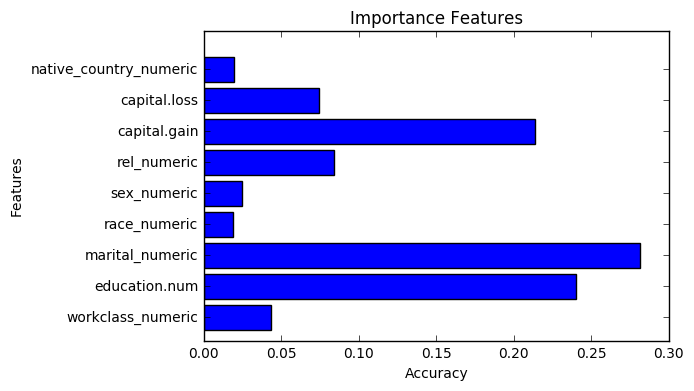

In [7]:
extra_tree = ExtraTreesClassifier()
extra_tree.fit(X, y)
fea_imp = extra_tree.feature_importances_
print(fea_imp)
max_fea_imp = max(fea_imp)
print(max_fea_imp)

pos = np.arange(9) + 0.75
plt.barh(pos, fea_imp, align='center')
plt.yticks(pos, ('workclass_numeric', 'education.num', 'marital_numeric', 'race_numeric', 'sex_numeric', 'rel_numeric', 'capital.gain', 'capital.loss', 'native_country_numeric'))
plt.xlabel('Accuracy')
plt.ylabel('Features')
plt.title('Importance Features')
plt.grid(False)

In [8]:
X = csv_clean[['education.num', 'marital_numeric', 'capital.gain']]
y = csv_clean.income_over_50K

In [35]:
from imblearn.over_sampling import SMOTE
rseed=100

sm = SMOTE(random_state=rseed)
X_res, y_res = sm.fit_sample(X, y)
X_res = pd.DataFrame(X_res, columns=X.columns)
y_res = pd.Series(y_res, name='income_over_50K')
y_res.value_counts()

1    23068
0    23068
Name: income_over_50K, dtype: int64

In [10]:
#K-Fold cross-validation
kf = KFold(n_splits=5, random_state=100, shuffle=True)
kf.get_n_splits(X_res)

#X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=.4)

5

In [11]:
import itertools
import matplotlib.pyplot as plt

# plot_confusion_matrix taken from: 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [12]:
def crossval_report(X, y, clf, kf):
    cm = None
    y_predicted_overall = None
    y_test_overall = None
    for train_index, test_index in  kf.split(X_res):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_predicted = clf.predict(X_test)

        if y_predicted_overall is None:
            y_predicted_overall = y_predicted
            y_test_overall = y_test
        else: 
            y_predicted_overall = np.concatenate([y_predicted_overall, y_predicted])
            y_test_overall = np.concatenate([y_test_overall, y_test])
    
    print (classification_report(y_test_overall, y_predicted_overall, digits=3))

[ 0.80342436  0.80828005  0.81760052  0.80459521  0.8075214 ]
Accuracy: 0.81 (+/- 0.01)
             precision    recall  f1-score   support

          0      0.872     0.723     0.790     23068
          1      0.763     0.893     0.823     23068

avg / total      0.818     0.808     0.807     46136

Confusion matrix, without normalization
[[3982  543]
 [1273 3430]]


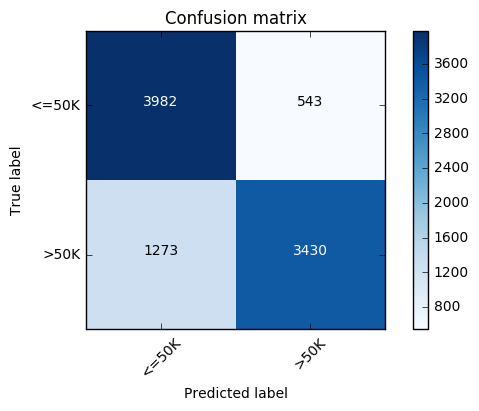

0.803207628955
Confusion matrix, without normalization
[[4141  516]
 [1254 3316]]


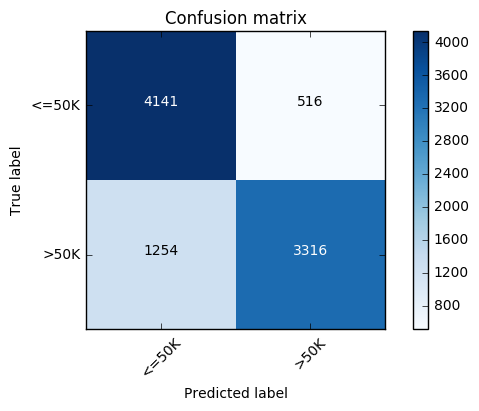

0.808171670099
Confusion matrix, without normalization
[[4257  445]
 [1231 3294]]


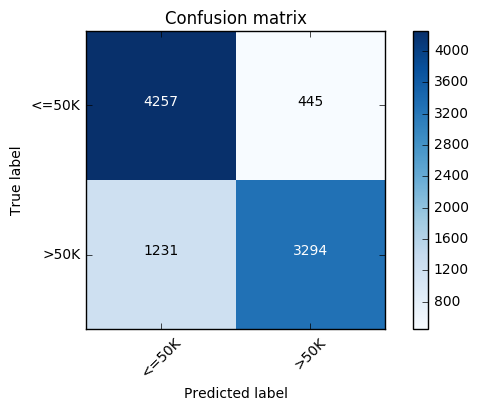

0.818359163325
Confusion matrix, without normalization
[[4082  486]
 [1320 3339]]


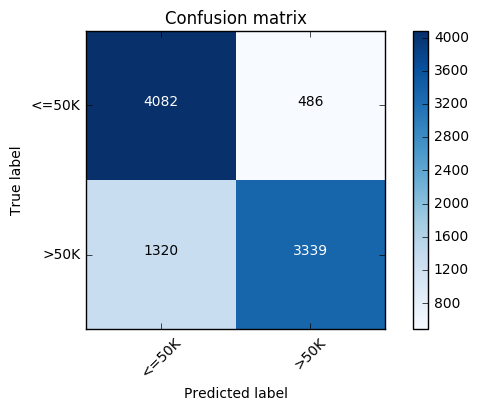

0.804270076948
Confusion matrix, without normalization
[[4122  494]
 [1282 3329]]


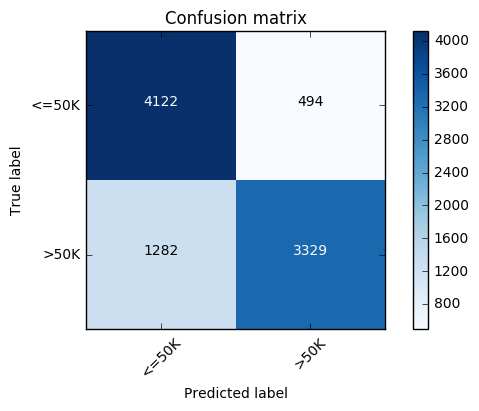

0.807521404574


In [13]:
clf = RandomForestClassifier(n_estimators=25)

scores = cross_val_score(clf, X_res, y_res, cv=kf)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

crossval_report(X_res, y_res, clf, kf)

for train_index, test_index in kf.split(X_res):
    X_train, X_test = X_res.iloc[train_index], X_res.loc[test_index]
    y_train, y_test = y_res[train_index], y_res[test_index]
    clf = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    # Apply same above for Logistic Regression, just need to change RFC
    # to LR and print out accuracy score
    matrix = confusion_matrix(y_test, predictions, labels=[1, 0])
    plt.figure()
    plot_confusion_matrix(matrix, classes=["<=50K", ">50K"],
                          title='Confusion matrix')
    plt.show()
    #print(sklearn.metrics.confusion_matrix(y_test,predictions))
    print(sklearn.metrics.accuracy_score(y_test, predictions))

[ 0.80288253  0.80697952  0.81662512  0.80437845  0.80784654]
Accuracy: 0.81 (+/- 0.01)
             precision    recall  f1-score   support

          0      0.867     0.726     0.790     23068
          1      0.764     0.889     0.822     23068

avg / total      0.816     0.807     0.806     46136

[ 0.80255743  0.80762978  0.8177089   0.80340306  0.80719627]
Accuracy: 0.81 (+/- 0.01)
             precision    recall  f1-score   support

          0      0.870     0.723     0.790     23068
          1      0.763     0.892     0.822     23068

avg / total      0.816     0.807     0.806     46136

[ 0.8023407   0.80730465  0.81749214  0.80372819  0.8075214 ]
Accuracy: 0.81 (+/- 0.01)
             precision    recall  f1-score   support

          0      0.871     0.723     0.790     23068
          1      0.763     0.893     0.823     23068

avg / total      0.817     0.808     0.806     46136

[ 0.8029909   0.80817167  0.81749214  0.80470359  0.80730465]
Accuracy: 0.81 (+/- 0.01)
   

array([ 0.80774243,  0.80769909,  0.80767742,  0.80813259,  0.80806756,
        0.80824097,  0.80787248,  0.80817594,  0.80828432,  0.80821928,
        0.80804588,  0.80789415,  0.80819761,  0.80802421,  0.80830598,
        0.8081976 ,  0.80817593,  0.80804588,  0.80824097,  0.80843603,
        0.80837101,  0.80811091,  0.80830599,  0.8082843 ,  0.80832767])

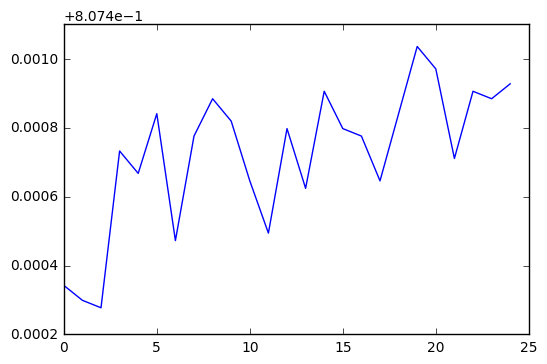

In [14]:
trees = range(25)
accuracy = np.zeros(25)
#accuracy = np.zeros(25)
for i in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = i + 1)
    scores = cross_val_score(clf, X_res, y_res, cv=kf)
    print(scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    crossval_report(X_res, y_res, clf, kf)
    accuracy[i] = scores.mean()
#    clf = clf.fit(X_train, y_train)
#    pred = clf.predict(X_test)
#    accuracy[i]=sklearn.metrics.accuracy_score(y_test, pred)
plt.cla()
plt.plot(trees, accuracy)
accuracy

In [15]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

extra_tree = ExtraTreesClassifier()
scores = cross_val_score(extra_tree, X_res, y_res, cv=kf)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

np.array([np.arange(10)]*3).T
max_fea_imp = np.zeros(5)
for (i, (train_index, test_index)) in zip(list(range(0, 5)), kf.split(X_res)):
    X_train, X_test = X_res.iloc[train_index], X_res.loc[test_index]
    y_train, y_test = y_res[train_index], y_res[test_index]
    extra_tree.fit(X_train, y_train)
    fea_imp[i] = extra_tree.feature_importances_
    print("Fea imp:", fea_imp[i])
    #max_fea_imp[i] = max(fea_imp[i])
    #print("Maximum fea imp", max_fea_imp[i])
fea_imp = extra_tree.feature_importances_
fea_imp = mean(fea_imp)
max_fea_imp = mean(fea_imp)

pos = np.arange(8) + 0.75
plt.barh(pos, fea_imp, align='center')
plt.yticks(pos, ('workclass_numeric', 'education.num', 'marital_numeric', 'race_numeric', 'sex_numeric', 'rel_numeric', 'capital.gain', 'capital.loss'))
plt.xlabel('Accuracy')
plt.ylabel('Features')
plt.title('Importance Features')
plt.grid(False)
plt.show()

[ 0.78781968  0.76763845  0.77208193  0.78465373  0.79137314]
Accuracy: 0.78 (+/- 0.02)
             precision    recall  f1-score   support

          0      0.857     0.674     0.755     23068
          1      0.731     0.887     0.802     23068

avg / total      0.794     0.781     0.778     46136

Confusion matrix, without normalization
[[3942  583]
 [1375 3328]]


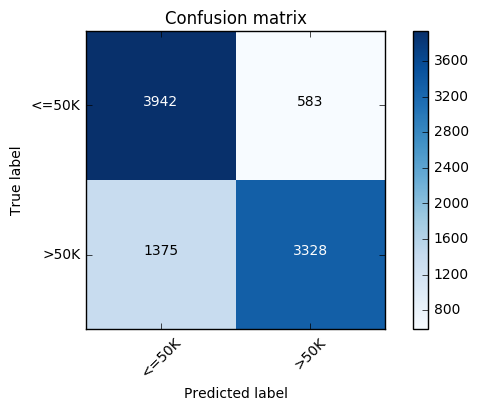

Confusion matrix, without normalization
[[4153  504]
 [1640 2930]]


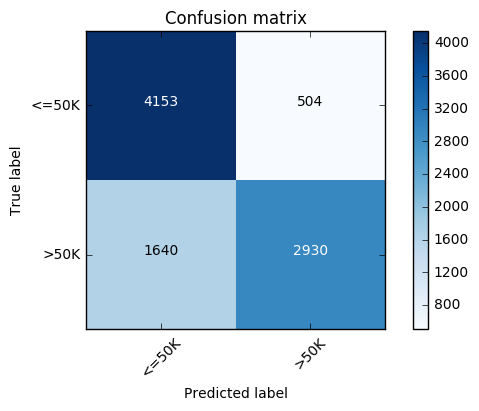

Confusion matrix, without normalization
[[4248  454]
 [1649 2876]]


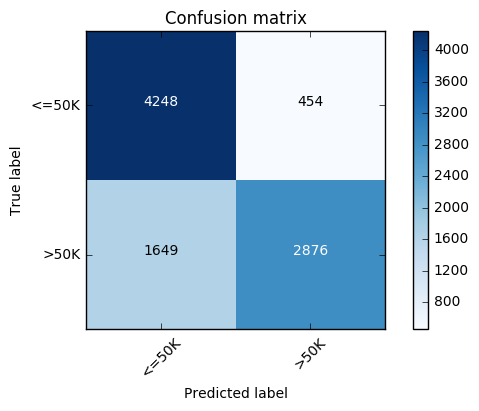

Confusion matrix, without normalization
[[4063  505]
 [1482 3177]]


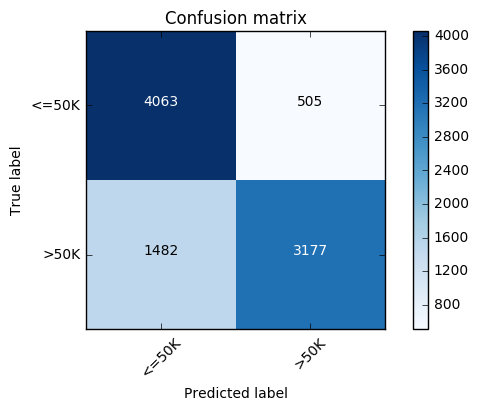

Confusion matrix, without normalization
[[4063  553]
 [1372 3239]]


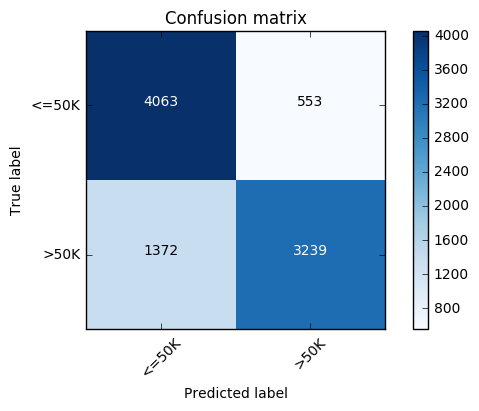

In [16]:
lr = LogisticRegression()
#lr = lr.fit(X_train,y_train)
#predictions = lr.predict(X_test)
#sklearn.metrics.confusion_matrix(y_test,predictions)
scores = cross_val_score(lr, X_res, y_res, cv=kf)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
crossval_report(X_res, y_res, lr, kf)

for train_index, test_index in kf.split(X_res):
    X_train, X_test = X_res.iloc[train_index], X_res.loc[test_index]
    y_train, y_test = y_res[train_index], y_res[test_index]
    lrf = lr.fit(X_train,y_train)
    predictions = lrf.predict(X_test)
    #print(sklearn.metrics.confusion_matrix(y_test,predictions))
    matrix = confusion_matrix(y_test, predictions, labels=[1, 0])
    plt.figure()
    plot_confusion_matrix(matrix, classes=["<=50K", ">50K"],
                          title='Confusion matrix')
    plt.show()

In [17]:
#sklearn.metrics.accuracy_score(y_test, predictions)

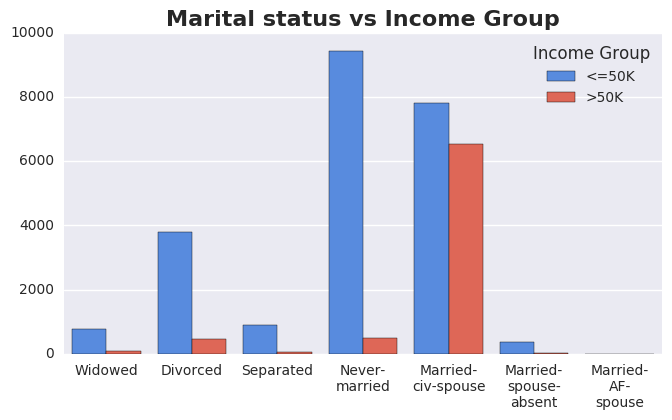

In [18]:
import matplotlib.gridspec as gridspec
import seaborn as sns
gs = gridspec.GridSpec(7, 2)
plt.figure(figsize=(17,34))

#Marital status vs Income Group
ax1 = plt.subplot(gs[0])
sns.countplot(csv_clean['marital.status'], hue=csv_clean['income'], ax=ax1, palette=['#4286f4', '#f45641'])
ax1.set_ylabel(""), ax1.set_xlabel("")
ax1.set_xticklabels(['Widowed', 'Divorced', 'Separated', 'Never-\nmarried',
                     'Married-\nciv-spouse', 'Married-\nspouse-\nabsent',
                     'Married-\nAF-\nspouse'])
ax1.legend(title="Income Group")
ax1.set_title("Marital status vs Income Group", fontsize=16, fontweight='bold')

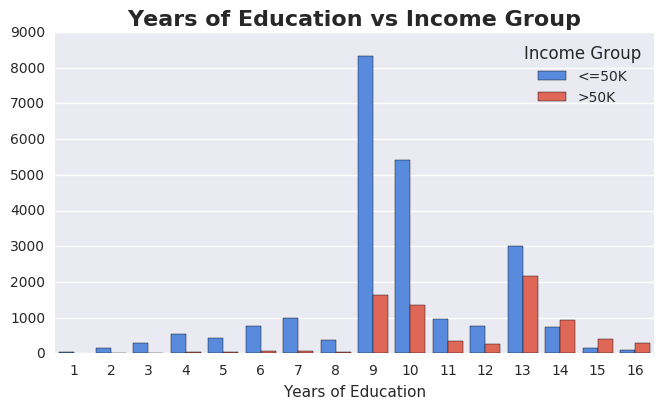

In [19]:
#Education num vs Income Group
gs = gridspec.GridSpec(7,2)
plt.figure(figsize=(17,34))
ax2 = plt.subplot(gs[0])
sns.countplot(csv_clean['education.num'], hue=csv_clean['income'], ax=ax2, palette=['#4286f4', '#f45641'])
ax2.set_xlabel('Years of Education'), ax2.set_ylabel("")
ax2.set_title("Years of Education vs Income Group", fontsize=16, fontweight='bold')
ax2.legend(title="Income Group")

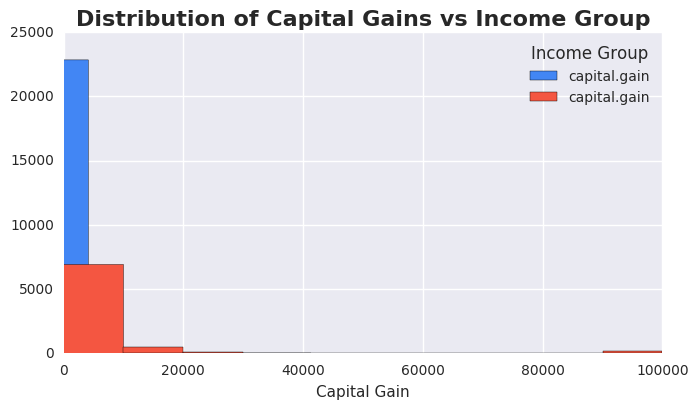

In [20]:
#Capital Gain vs Income Group
gs = gridspec.GridSpec(7,2)
plt.figure(figsize=(17,34))
ax3 = plt.subplot(gs[0])
ax3.hist(csv_clean.loc[csv_clean['income']=="<=50K", 'capital.gain'], color="#4286f4")
ax3.hist(csv_clean.loc[csv_clean['income']==">50K", 'capital.gain'], color="#f45641")
ax3.set_ylabel(""), ax3.set_xlabel("Capital Gain")
ax3.legend(title="Income Group")
ax3.set_title('Distribution of Capital Gains vs Income Group', fontsize=16, fontweight='bold')

In [21]:
from sklearn import tree

dectree = tree.DecisionTreeClassifier(max_features=3, random_state=rseed, max_depth=3)
dectree.fit(X_res, y_res)
scores = cross_val_score(dectree, X_res, y_res, cv=kf)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
crossval_report(X_res, y_res, dectree, kf)

[ 0.772215    0.77652541  0.7809689   0.77880134  0.77565839]
Accuracy: 0.78 (+/- 0.01)
             precision    recall  f1-score   support

          0      0.802     0.735     0.767     23068
          1      0.755     0.819     0.786     23068

avg / total      0.779     0.777     0.776     46136



Confusion matrix, without normalization
[[18896  4172]
 [ 6124 16944]]


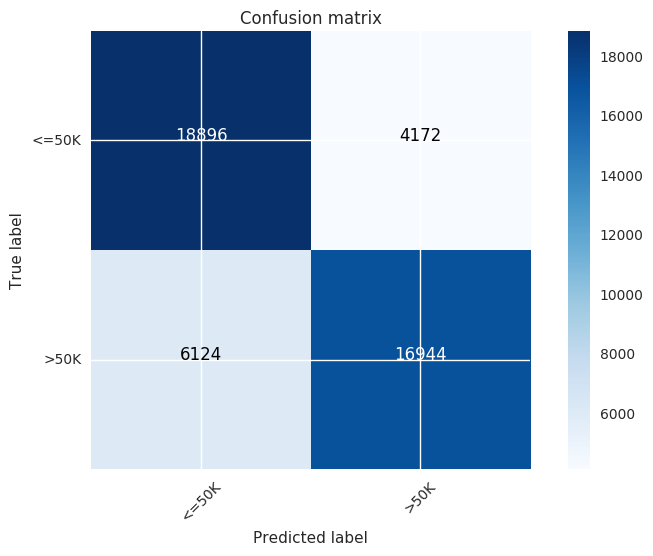

In [40]:
y_predicted_overall = None
y_test_overall = None
for train_index, test_index in kf.split(X_res):
    X_train, X_test = X_res.iloc[train_index], X_res.loc[test_index]
    y_train, y_test = y_res[train_index], y_res[test_index]
    dectree.fit(X_train, y_train)
    y_predicted = dectree.predict(X_test)

    if y_predicted_overall is None:
        y_predicted_overall = y_predicted
        y_test_overall = y_test
    else: 
        y_predicted_overall = np.concatenate([y_predicted_overall, y_predicted])
        y_test_overall = np.concatenate([y_test_overall, y_test])
    
#print (classification_report(y_test_overall, y_predicted_overall, digits=3))
matrix = confusion_matrix(y_test_overall, y_predicted_overall, labels=[1, 0])
plt.figure()
plot_confusion_matrix(matrix, classes=["<=50K", ">50K"],
                      title='Confusion matrix')
plt.show()

In [22]:
print(X_res.columns)
print(dectree.feature_importances_)

Index(['education.num', 'marital_numeric', 'capital.gain'], dtype='object')
[ 0.16199288  0.64687056  0.19113655]


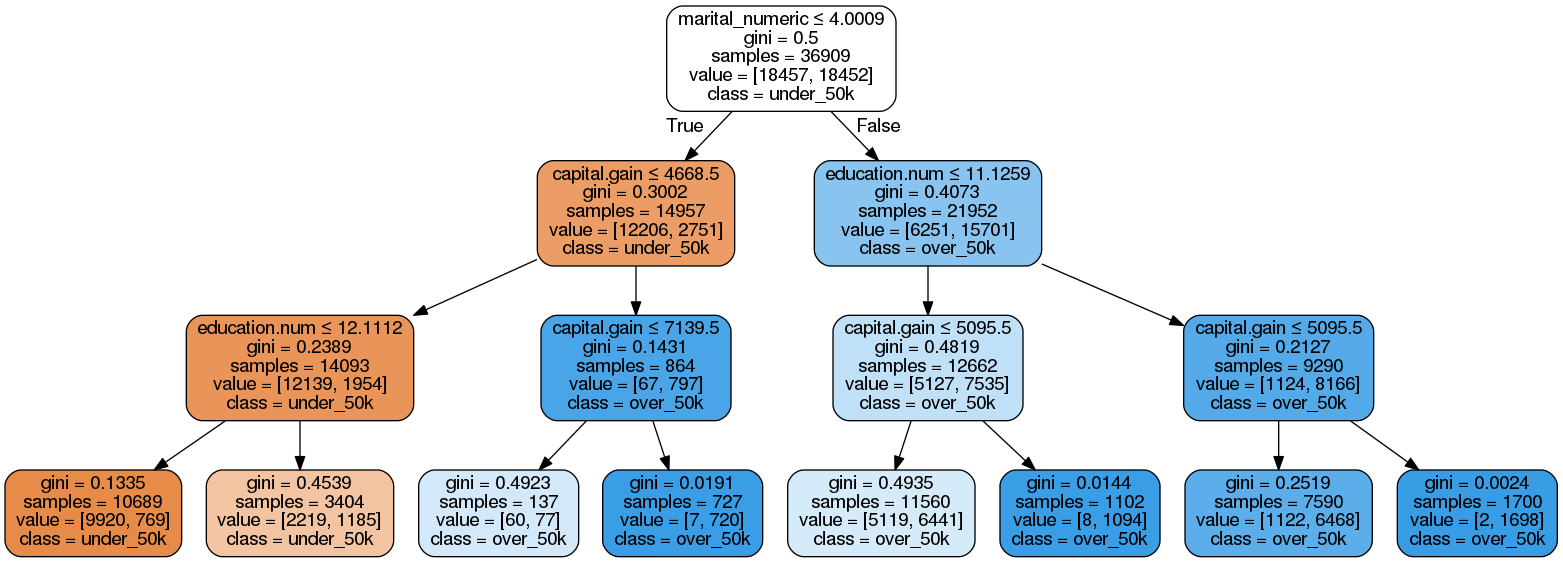

In [23]:
import pydotplus
from IPython.display import Image  
dot_data = tree.export_graphviz(dectree, out_file=None, 
                         feature_names=X_res.columns,  
                         class_names=['under_50k', 'over_50k'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())   

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

from sklearn import model_selection

n_neighbors = 7
    
for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    scores = cross_val_score(clf, X_res, y_res, cv=kf)
    print(scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    crossval_report(X_res, y_res, clf, kf)

[ 0.79052883  0.75300748  0.70564647  0.78422022  0.7403273 ]
Accuracy: 0.75 (+/- 0.06)
             precision    recall  f1-score   support

          0      0.704     0.879     0.782     23068
          1      0.839     0.631     0.720     23068

avg / total      0.771     0.755     0.751     46136

[ 0.79139575  0.75365774  0.70705538  0.78443698  0.74086919]
Accuracy: 0.76 (+/- 0.06)
             precision    recall  f1-score   support

          0      0.705     0.880     0.782     23068
          1      0.840     0.631     0.721     23068

avg / total      0.772     0.755     0.752     46136

